<a href="https://colab.research.google.com/github/riyaz7781/riyaz7781/blob/main/Clustering(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the necessary Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
import warnings
warnings.filterwarnings("ignore")


**Load the dataset**

In [ ]:
data1=pd.read_csv("/content/EastWestAirlines.csv")
data1

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


**Basic** **EDA**

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [ ]:
data1.shape

(3999, 12)

In [ ]:
data1.isna().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [ ]:
data1.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


**HIERARCHICAL** **CLUSTERING**

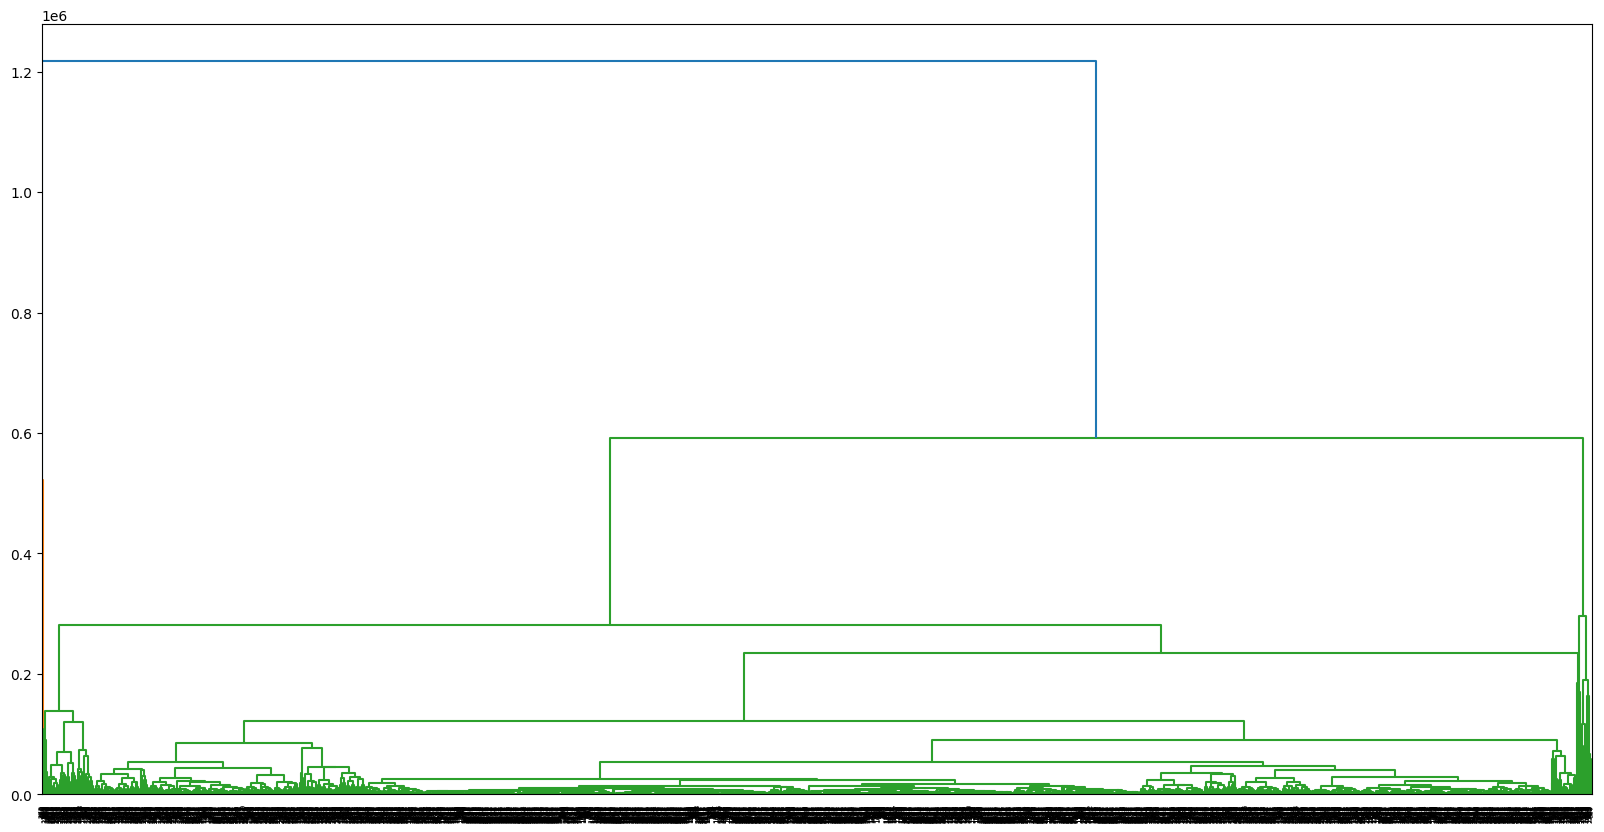

In [ ]:
plt.figure(figsize=(20,10))
dendogram=sch.dendrogram(sch.linkage(data1,method="average"))

In [ ]:
hier_clus=AgglomerativeClustering(n_clusters=5,affinity="euclidean",linkage="average")


In [ ]:
y_pred=hier_clus.fit_predict(data1)
Clusters=pd.DataFrame(y_pred,columns=["Clusters"])
Clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


,Clusters
0,0
1,0
2,0
3,0
4,0
...,...
3994,0
3995,0
3996,0
3997,0


In [ ]:
final=pd.concat([data1,Clusters],axis=1).sort_values("Clusters")
final

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
2658,2678,27438,0,1,1,1,2528,6,2528,6,2490,0,0
2659,2679,14748,0,1,1,1,2210,7,0,0,2497,1,0
2660,2680,49514,0,1,1,1,4500,22,0,0,2569,0,0
2661,2681,7457,0,1,1,1,17131,5,0,0,2496,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,516,889456,1024,5,1,1,98959,29,850,4,6652,1,4
117,120,969559,0,1,1,1,2500,3,1000,2,7718,1,4
1188,1200,837979,0,1,1,1,18372,15,1450,4,5373,1,4
3772,3795,822321,0,5,1,1,138334,26,600,2,3288,1,4


**K**-**MEANS** **CLUSTERING**

In [ ]:
kmeans=KMeans(n_clusters=14,random_state=42)
kmeans.fit(data1)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=14, random_state=42)

In [ ]:
kmeans.inertia_

1834175773148.6455

We are using elbow curve to determine the no.of clusters(K)

In [ ]:
wcss=[]
for i in range(1,15):
  kmeans=KMeans(n_clusters=i,random_state=0)
  kmeans.fit(data1)
  wcss.append(kmeans.inertia_)

In [ ]:
wcss

[42967206847420.62,
 20828852094270.258,
 11794254039243.787,
 7554668286111.583,
 5775051202470.368,
 4546507928780.678,
 3702589069199.205,
 3276988157640.797,
 2902566130528.8184,
 2626868222415.1846,
 2388857476451.359,
 2145927982985.3093,
 1970924985403.4434,
 1834070337748.032]

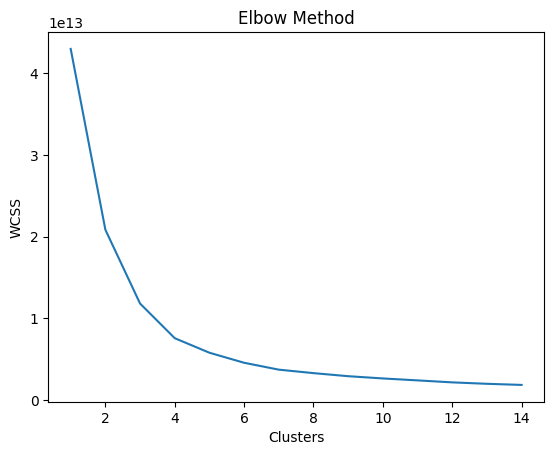

In [ ]:
plt.plot(range(1,15),wcss)
plt.title("Elbow Method")
plt.xlabel("Clusters")
plt.ylabel("WCSS")
plt.show()

In [ ]:
from sklearn.cluster import KMeans
kmeans1=KMeans(n_clusters=7,random_state=0)
kmeans1.fit(data1)

KMeans(n_clusters=7, random_state=0)

In [ ]:
kmeans1.labels_

array([3, 3, 3, ..., 6, 6, 3], dtype=int32)

In [ ]:
data2=pd.DataFrame(kmeans1.labels_,columns=["Cluster ID"])
data2


,Cluster ID
0,3
1,3
2,3
3,3
4,0
...,...
3994,3
3995,6
3996,6
3997,6


In [ ]:
data3=pd.concat([data1,data2],axis=1)
data3

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster ID
0,1,28143,0,1,1,1,174,1,0,0,7000,0,3
1,2,19244,0,1,1,1,215,2,0,0,6968,0,3
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,3
3,4,14776,0,1,1,1,500,1,0,0,6952,0,3
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,3
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,6
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,6
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,6


In [ ]:
data4=data3.drop(["ID#"],axis=1)
data4

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster ID
0,28143,0,1,1,1,174,1,0,0,7000,0,3
1,19244,0,1,1,1,215,2,0,0,6968,0,3
2,41354,0,1,1,1,4123,4,0,0,7034,0,3
3,14776,0,1,1,1,500,1,0,0,6952,0,3
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,3
3995,64385,0,1,1,1,981,5,0,0,1395,1,6
3996,73597,0,3,1,1,25447,8,0,0,1402,1,6
3997,54899,0,1,1,1,500,1,500,1,1401,0,6


In [ ]:
data4.groupby("Cluster ID").agg(["mean"])

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Cluster ID,,,,,,,,,,,
0,1.275126e+05,230.817708,3.006944,1.013889,1.041667,32397.265625,16.447917,783.171875,2.295139,4746.440972,0.456597
1,7.283600e+05,258.636364,3.500000,1.000000,1.136364,62470.818182,22.000000,1600.909091,5.727273,6189.681818,0.863636
2,3.948273e+05,465.400000,3.188235,1.035294,1.000000,48679.482353,19.176471,1522.247059,4.682353,5859.458824,0.717647
3,1.980550e+04,96.539196,1.372362,1.017588,1.000000,6018.991960,7.609045,214.708040,0.673869,3609.872864,0.286432
4,2.210648e+05,303.074510,2.917647,1.000000,1.000000,34492.215686,18.105882,1094.184314,3.137255,5107.835294,0.505882
5,1.288916e+06,1528.000000,3.000000,1.000000,1.000000,39098.000000,24.600000,2754.600000,11.400000,7821.600000,0.800000
6,6.479469e+04,113.580675,2.500938,1.011257,1.020638,21970.452158,14.001876,472.782364,1.359287,4293.329268,0.408068


In [ ]:
data4["Cluster ID"].value_counts()

3    1990
6    1066
0     576
4     255
2      85
1      22
5       5
Name: Cluster ID, dtype: int64

**DBSCAN** **CLUSTERING**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
std=StandardScaler()
a=std.fit_transform(data1)
a

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [ ]:
dbscan=DBSCAN(eps=0.82,min_samples=7)
dbscan.fit(a)

DBSCAN(eps=0.82, min_samples=7)

In [ ]:
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
x1=pd.DataFrame(dbscan.labels_,columns=["Clusters"])
x1

,Clusters
0,0
1,0
2,0
3,0
4,-1
...,...
3994,1
3995,1
3996,1
3997,0


In [ ]:
data5=pd.concat([data1,x1],axis=1).sort_values("Clusters")
data5

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
1999,2016,327126,1452,5,1,1,97997,25,350,3,4440,1,-1
3063,3085,89112,4670,2,1,1,28670,29,0,0,2680,0,-1
1131,1143,3507,1745,1,1,1,14500,7,0,0,5643,1,-1
1129,1141,1625,0,1,1,1,1375,4,0,0,1547,0,-1
1126,1138,375927,0,2,1,1,18202,30,1100,3,5652,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3980,4003,28867,0,3,1,1,19169,28,0,0,1425,0,4
3601,3624,74093,0,3,1,1,20055,37,0,0,949,0,4
3974,3997,58387,0,3,1,1,14581,39,0,0,1435,0,4
3991,4014,39142,0,3,1,1,14981,28,0,0,1408,0,4


In [ ]:
data5["Clusters"].value_counts()

 0    2172
-1     913
 1     882
 2      16
 3       9
 4       7
Name: Clusters, dtype: int64